In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

#the model used to fit&predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#pipeline with its' preprocessor's transformers
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

#used for estimating model accuracy and getting reports
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv(r"C:\Users\Pavithran\Desktop\Loan_Approval_Prediction\LoanPrediction.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847222 entries, 0 to 847221
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Age                   847222 non-null  int64 
 1   Type_of_employement   847222 non-null  object
 2   Work_experience       847222 non-null  int64 
 3   Income                847222 non-null  int64 
 4   Per_Loan_amount       847222 non-null  int64 
 5   Per_loan_amount_term  847222 non-null  int64 
 6   Per_credit_history    847222 non-null  int64 
 7   Per_loan_status       847222 non-null  object
 8   Gram                  847222 non-null  int64 
 9   Gold_loan_amount      847222 non-null  int64 
 10  Gold_loan_term        847222 non-null  int64 
 11  Gold_loan_status      847222 non-null  object
 12  Score                 847222 non-null  int64 
 13  Fee_structure         847222 non-null  int64 
 14  Edu_loan_amount       847222 non-null  int64 
 15  Edu_coapp_income 

,Age,Type_of_employement,Work_experience,Income,Per_Loan_amount,Per_loan_amount_term,Per_credit_history,Per_loan_status,Gram,Gold_loan_amount,Gold_loan_term,Gold_loan_status,Score,Fee_structure,Edu_loan_amount,Edu_coapp_income,Edu_credit_history,Edu_loan_status
0,49,Bussiness People,15,10000,2000,12,1,Yes,1,200,1,Yes,92,10000,1000,15821,1,Yes
1,42,Bussiness People,13,10000,4000,12,1,Yes,1,400,1,Yes,81,10000,1200,16725,1,Yes
2,28,Bussiness People,3,10000,6000,12,1,Yes,1,600,1,Yes,79,10000,1400,17980,1,Yes
3,49,Self-Employed,12,10000,8000,12,1,Yes,1,800,1,Yes,97,10000,1600,14901,1,Yes
4,31,Self-Employed,8,10000,10000,12,1,Yes,1,1000,1,Yes,94,10000,1800,15070,1,Yes


In [5]:
[print(col, df[col].nunique()) for col in df.columns if df[col].dtype=='object']


Type_of_employement 3
Per_loan_status 2
Gold_loan_status 2
Edu_loan_status 2


[None, None, None, None]

In [6]:
personal_loan = df
personal_loan.head()

,Age,Type_of_employement,Work_experience,Income,Per_Loan_amount,Per_loan_amount_term,Per_credit_history,Per_loan_status,Gram,Gold_loan_amount,Gold_loan_term,Gold_loan_status,Score,Fee_structure,Edu_loan_amount,Edu_coapp_income,Edu_credit_history,Edu_loan_status
0,49,Bussiness People,15,10000,2000,12,1,Yes,1,200,1,Yes,92,10000,1000,15821,1,Yes
1,42,Bussiness People,13,10000,4000,12,1,Yes,1,400,1,Yes,81,10000,1200,16725,1,Yes
2,28,Bussiness People,3,10000,6000,12,1,Yes,1,600,1,Yes,79,10000,1400,17980,1,Yes
3,49,Self-Employed,12,10000,8000,12,1,Yes,1,800,1,Yes,97,10000,1600,14901,1,Yes
4,31,Self-Employed,8,10000,10000,12,1,Yes,1,1000,1,Yes,94,10000,1800,15070,1,Yes


In [7]:
personal_loan.drop('Type_of_employement',axis=1, inplace=True)
personal_loan.drop('Gram',axis=1, inplace=True)
personal_loan.drop('Gold_loan_amount',axis=1, inplace=True)
personal_loan.drop('Score',axis=1, inplace=True)
personal_loan.drop('Fee_structure',axis=1, inplace=True)
personal_loan.drop('Edu_loan_amount',axis=1, inplace=True)
personal_loan.drop('Edu_coapp_income',axis=1, inplace=True)
personal_loan.drop('Edu_credit_history',axis=1, inplace=True)
personal_loan.drop('Gold_loan_status',axis=1, inplace=True)
personal_loan.drop('Edu_loan_status',axis=1, inplace=True)
personal_loan.head()


,Age,Work_experience,Income,Per_Loan_amount,Per_loan_amount_term,Per_credit_history,Per_loan_status,Gold_loan_term
0,49,15,10000,2000,12,1,Yes,1
1,42,13,10000,4000,12,1,Yes,1
2,28,3,10000,6000,12,1,Yes,1
3,49,12,10000,8000,12,1,Yes,1
4,31,8,10000,10000,12,1,Yes,1


In [8]:
personal_loan.drop('Gold_loan_term',axis=1, inplace=True)


In [9]:
personal_loan.value_counts()

Age  Work_experience  Income  Per_Loan_amount  Per_loan_amount_term  Per_credit_history  Per_loan_status
15   1                10000   5000             36                    1                   No                 1
40   0                76000   1917000          12                    1                   No                 1
                              1758000          12                    1                   No                 1
                                               36                    1                   No                 1
                                               60                    1                   No                 1
                                                                                                           ..
30   0                126000  180000           36                    1                   No                 1
                              216000           60                    1                   No                 1
               

In [10]:
X=personal_loan.drop('Per_loan_status',axis=1)
y=personal_loan['Per_loan_status']
X.head()

,Age,Work_experience,Income,Per_Loan_amount,Per_loan_amount_term,Per_credit_history
0,49,15,10000,2000,12,1
1,42,13,10000,4000,12,1
2,28,3,10000,6000,12,1
3,49,12,10000,8000,12,1
4,31,8,10000,10000,12,1


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = LabelEncoder().fit_transform(df['Per_loan_status'])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

X_train.shape, X_test.shape

((677777, 6), (169445, 6))

In [13]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(np.asmatrix(X_train), y_train)
score = xgb.score(np.asmatrix(X_test), y_test)
print("Accuracy",score*100)

Accuracy 99.93921331405471


In [14]:
X_new = np.array([32,9,14000,60000,12,0]).reshape(1,-1)

In [15]:
prediction = xgb.predict(X_new)
if prediction == 1:
    print("Approved")
else:
    print("Loan not approved")

Loan not approved


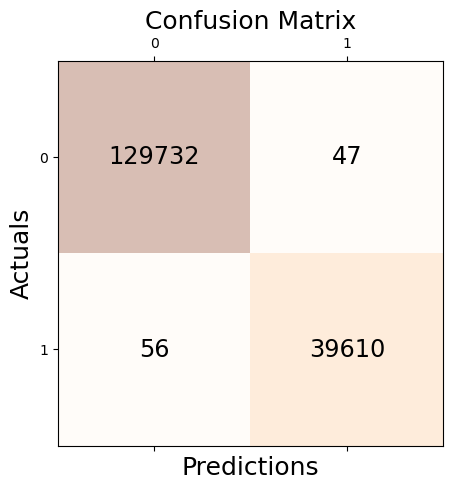

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred = xgb.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
# #print('Precision: ', precision_score(y_test, y_pred)*100)
# print('F1 Score: ',f1_score(y_test, y_pred)*100)
# print('Recall: ', recall_score(y_test, y_pred)*100)

In [18]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
# print('Precision: ', precision_score(y_test, y_pred)*100)
data = precision_recall_fscore_support(y_test, y_pred, average='macro')

print('Precision: ', data[0]*100)
print('F1 Score: ',data[2]*100)
print('Recall: ', data[1]*100)

Precision:  99.9191682182901
F1 Score:  99.91523484230885
Recall:  99.91130287215162


In [19]:
gold_loan = pd.read_csv(r"C:\Users\Pavithran\Desktop\Loan_Approval_Prediction\LoanPrediction.csv")
gold_loan.head()

,Age,Type_of_employement,Work_experience,Income,Per_Loan_amount,Per_loan_amount_term,Per_credit_history,Per_loan_status,Gram,Gold_loan_amount,Gold_loan_term,Gold_loan_status,Score,Fee_structure,Edu_loan_amount,Edu_coapp_income,Edu_credit_history,Edu_loan_status
0,49,Bussiness People,15,10000,2000,12,1,Yes,1,200,1,Yes,92,10000,1000,15821,1,Yes
1,42,Bussiness People,13,10000,4000,12,1,Yes,1,400,1,Yes,81,10000,1200,16725,1,Yes
2,28,Bussiness People,3,10000,6000,12,1,Yes,1,600,1,Yes,79,10000,1400,17980,1,Yes
3,49,Self-Employed,12,10000,8000,12,1,Yes,1,800,1,Yes,97,10000,1600,14901,1,Yes
4,31,Self-Employed,8,10000,10000,12,1,Yes,1,1000,1,Yes,94,10000,1800,15070,1,Yes


In [20]:
gold_loan.drop('Age',axis=1, inplace=True)
gold_loan.drop('Type_of_employement',axis=1, inplace=True)
gold_loan.drop('Work_experience',axis=1, inplace=True)
gold_loan.drop('Income',axis=1, inplace=True)
gold_loan.drop('Per_Loan_amount',axis=1, inplace=True)
gold_loan.drop('Per_loan_amount_term',axis=1, inplace=True)
gold_loan.drop('Per_credit_history',axis=1, inplace=True)
gold_loan.drop('Score',axis=1, inplace=True)
gold_loan.drop('Edu_loan_amount',axis=1, inplace=True)
gold_loan.drop('Edu_coapp_income',axis=1, inplace=True)
gold_loan.drop('Edu_credit_history',axis=1, inplace=True)
gold_loan.drop('Per_loan_status',axis=1, inplace=True)
gold_loan.drop('Edu_loan_status',axis=1, inplace=True)
gold_loan.drop('Fee_structure',axis=1, inplace=True)
gold_loan.head()

,Gram,Gold_loan_amount,Gold_loan_term,Gold_loan_status
0,1,200,1,Yes
1,1,400,1,Yes
2,1,600,1,Yes
3,1,800,1,Yes
4,1,1000,1,Yes


In [30]:
X=gold_loan.drop('Gold_loan_status',axis=1)
y=gold_loan['Gold_loan_status']
X.head()

,Gram,Gold_loan_amount,Gold_loan_term
0,1,200,1
1,1,400,1
2,1,600,1
3,1,800,1
4,1,1000,1


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = LabelEncoder().fit_transform(gold_loan['Gold_loan_status'])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

X_train.shape, X_test.shape

((677777, 3), (169445, 3))

In [33]:
from xgboost import XGBClassifier
goldmodel = XGBClassifier(learning_rate=0.4,max_depth=7)
goldmodel.fit(np.asmatrix(X_train), y_train)
score = goldmodel.score(np.asmatrix(X_test), y_test)
print("Accuracy",score*100)

Accuracy 99.98819676001062


In [34]:
X_new = np.array([7,30000,2]).reshape(1,-1)

In [35]:
prediction = goldmodel.predict(X_new)
if prediction == 1:
    print("Approved")
else:
    print("Loan not approved")

Loan not approved


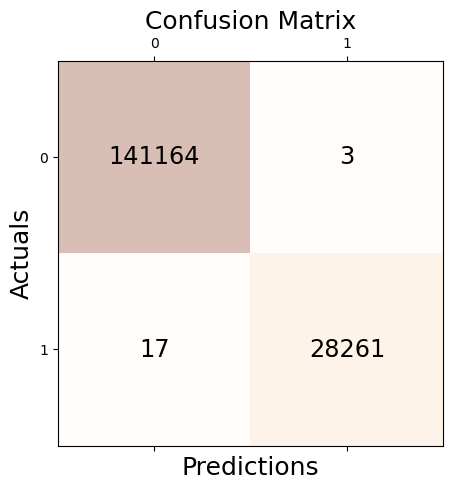

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred = goldmodel.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
# print('Precision: ', precision_score(y_test, y_pred)*100)
data = precision_recall_fscore_support(y_test, y_pred, average='macro')

print('Precision: ', data[0]*100)
print('F1 Score: ',data[2]*100)
print('Recall: ', data[1]*100)

Precision:  99.98867225538505
F1 Score:  99.97877230340005
Recall:  99.96887872584061


In [38]:
education_loan = pd.read_csv(r"C:\Users\Pavithran\Desktop\Loan_Approval_Prediction\LoanPrediction.csv")
education_loan.head()

,Age,Type_of_employement,Work_experience,Income,Per_Loan_amount,Per_loan_amount_term,Per_credit_history,Per_loan_status,Gram,Gold_loan_amount,Gold_loan_term,Gold_loan_status,Score,Fee_structure,Edu_loan_amount,Edu_coapp_income,Edu_credit_history,Edu_loan_status
0,49.0,Bussiness People,15.0,10000.0,2000.0,12.0,1.0,Yes,1,200,1,Yes,92,10000,1000,15821,1,Yes
1,42.0,Bussiness People,13.0,10000.0,4000.0,12.0,1.0,Yes,1,400,1,Yes,81,10000,1200,16725,1,Yes
2,28.0,Bussiness People,3.0,10000.0,6000.0,12.0,1.0,Yes,1,600,1,Yes,79,10000,1400,17980,1,Yes
3,49.0,Self-Employed,12.0,10000.0,8000.0,12.0,1.0,Yes,1,800,1,Yes,97,10000,1600,14901,1,Yes
4,31.0,Self-Employed,8.0,10000.0,10000.0,12.0,1.0,Yes,1,1000,1,Yes,94,10000,1800,15070,1,Yes


In [39]:
education_loan.drop('Type_of_employement',axis=1, inplace=True)
education_loan.drop('Gram',axis=1, inplace=True)
education_loan.drop('Gold_loan_amount',axis=1, inplace=True)
education_loan.drop('Age',axis=1, inplace=True)
education_loan.drop('Work_experience',axis=1, inplace=True)
education_loan.drop('Income',axis=1, inplace=True)
education_loan.drop('Per_Loan_amount',axis=1, inplace=True)
education_loan.drop('Per_credit_history',axis=1, inplace=True)
education_loan.drop('Gold_loan_status',axis=1, inplace=True)
education_loan.drop('Per_loan_status',axis=1, inplace=True)
education_loan.drop('Per_loan_amount_term',axis=1, inplace=True)
education_loan.drop('Gold_loan_term',axis=1, inplace=True)

education_loan.head()

,Score,Fee_structure,Edu_loan_amount,Edu_coapp_income,Edu_credit_history,Edu_loan_status
0,92,10000,1000,15821,1,Yes
1,81,10000,1200,16725,1,Yes
2,79,10000,1400,17980,1,Yes
3,97,10000,1600,14901,1,Yes
4,94,10000,1800,15070,1,Yes


In [40]:
X=education_loan.drop('Edu_loan_status',axis=1)
y=education_loan['Edu_loan_status']
X.head()

,Score,Fee_structure,Edu_loan_amount,Edu_coapp_income,Edu_credit_history
0,92,10000,1000,15821,1
1,81,10000,1200,16725,1
2,79,10000,1400,17980,1
3,97,10000,1600,14901,1
4,94,10000,1800,15070,1


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = LabelEncoder().fit_transform(education_loan['Edu_loan_status'])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

X_train.shape, X_test.shape

((677777, 5), (169445, 5))

In [43]:
from xgboost import XGBClassifier
edumodel = XGBClassifier(learning_rate=0.4,max_depth=7)
edumodel.fit(np.asmatrix(X_train), y_train)
score = edumodel.score(np.asmatrix(X_test), y_test)
print("Accuracy",score*100)

Accuracy 99.98878692201009


In [44]:
X_new = np.array([70,100000, 50000, 19000, 1]).reshape(1,-1)

In [45]:
prediction = edumodel.predict(X_new)
if prediction == 1:
    print("Approved")
else:
    print("Loan not approved")

Approved


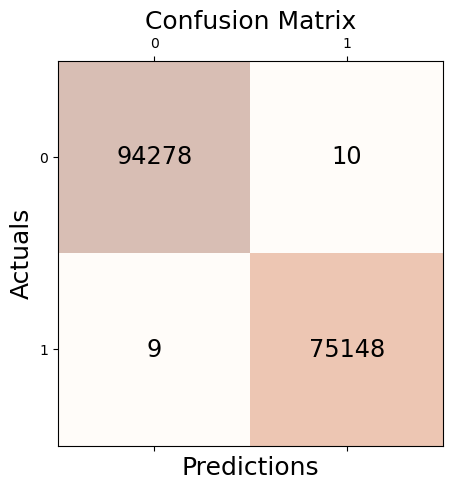

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred = edumodel.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
# print('Precision: ', precision_score(y_test, y_pred)*100)
data = precision_recall_fscore_support(y_test, y_pred, average='macro')

print('Precision: ', data[0]*100)
print('F1 Score: ',data[2]*100)
print('Recall: ', data[1]*100)

Precision:  99.98857468606204
F1 Score:  99.98864215541988
Recall:  99.98870963201482


In [101]:
import pickle 

pickle.dump(prediction,open('Decision_Tree_Model.pkl','wb'))